In [1]:
# Parse bed file and extract chrom, start, end positions of peaks
def parse_bed_file(peak_file):
    peaks = []
    with open(peak_file, 'r') as f:
        for line in f:
            if "#" in line:
                continue
            fields = line.strip().split('\t')
             # Change fields to 0, 1, 2 for BED file; 1, 2, 3 is for HOMER files (since I tested the functions using Lab 5 HOMER files)
            chrom = fields[1]
            start = int(fields[2])
            end = int(fields[3])
            peaks.append((chrom, start, end))
    return peaks

In [2]:
parse_bed_file('peaks.txt')

[('17', 35916928, 35917002),
 ('17', 36973463, 36973537),
 ('17', 57060668, 57060742),
 ('17', 35504026, 35504100),
 ('17', 45459121, 45459195),
 ('17', 57265117, 57265191),
 ('17', 83808182, 83808256),
 ('17', 87973887, 87973961),
 ('17', 85163102, 85163176),
 ('17', 45530608, 45530682),
 ('17', 87571775, 87571849),
 ('17', 56833584, 56833658),
 ('17', 46812509, 46812583),
 ('17', 36995629, 36995703),
 ('17', 46793174, 46793248),
 ('17', 89934138, 89934212),
 ('17', 17739476, 17739550),
 ('17', 31851941, 31852015),
 ('17', 28080666, 28080740),
 ('17', 32281271, 32281345),
 ('17', 35578367, 35578441),
 ('17', 43077230, 43077304),
 ('17', 45573287, 45573361),
 ('17', 56758217, 56758291),
 ('17', 66480469, 66480543),
 ('17', 66419526, 66419600),
 ('17', 37079261, 37079335),
 ('17', 10432972, 10433046),
 ('17', 29855368, 29855442),
 ('17', 29008102, 29008176),
 ('17', 45495557, 45495631),
 ('17', 70828295, 70828369),
 ('17', 31899122, 31899196),
 ('17', 37990772, 37990846),
 ('17', 560366

# Self-implementation (ignore)

In [3]:
# Self implementation of extracting sequence from genome fasta file based on peak coordinates; VERY SLOW
def extract_sequence(chrom, start, end, genome_fasta):
    sequence = ""
    target_chrom = False
    with open(genome_fasta, 'r') as f:
        for line in f:
            if len(sequence) >= end:
                break
            if ">" + chrom in line and not target_chrom:
                target_chrom = True
                continue
            if target_chrom:
                sequence += line.strip()
    return sequence[start:end]

In [4]:
foo = extract_sequence('Y', 100, 200, 'GRCm38.fa')    
foo

KeyboardInterrupt: 

# Function utilizing outside package

In [3]:
# Organizes the genome fasta file by chromosome so that we can later find sequences more quickly; MUCH FASTER
from Bio import SeqIO

def get_genome_info(fasta_file):
    genome_info = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        genome_info[record.id] = record.seq
    return genome_info

In [4]:
# Extract sequence from organized genome fasta file based on peak coordinates; FAST
def extract_sequence(chrom, start, end, genome_info):
    return str(genome_info[chrom][start:end])

In [5]:
# Combining all functions to get peak sequences
def get_peak_sequences(bed_file, genome_fasta_file):
    peaks = parse_bed_file(bed_file) # Get peak coordinates
    genome_info = get_genome_info(genome_fasta_file) # Organize genome fasta file for fast sequence extraction
    sequences = [] # Store peak sequences
    for peak in peaks: # Extract sequences for each peak
        chrom, start, end = peak # Unpack peak coordinates
        sequence = extract_sequence(chrom, start, end, genome_info) # Extract sequence
        sequences.append(sequence) # Store sequence
    return sequences # Return all sequences

In [8]:
import gibby
dna = get_peak_sequences('peaks.txt', 'GRCm38.fa')

In [9]:
foo3 = gibby.gibbs_sampler(dna, 20, 100)


KeyboardInterrupt: 

In [10]:
foo3

['GTTGGGCGGTGGCCGGGTAT',
 'GGAGGAGCAAGTGTTCCATG',
 'AAATAAGAGCTCACATTGAG',
 'ATGATAGCTCTGCCCTGGGG',
 'CCCGGGGGCTTGGGGTGTGT',
 'GCGGGGAGTGGAAGGGCGGG',
 'TTGTAGCTCTCTAGCGCCCC',
 'AGCTCCAATTTCTTGAATTT',
 'CCTGTCCCCACCCAGGTTAC',
 'CCCATATTTAGCTGCCTTCT',
 'TGTGGAGCAATACTGCCGCT',
 'ATACAAATGGTAATTTCAGG',
 'AATGTGGGTGTGTCCCAGTA',
 'ATCAAACAGGCTTAATTCTC',
 'CACACTTCCTCCCATAAGGC',
 'GGGAGCAGTGTCTTGGAGGC',
 'TAGCTCCGGGACCTCTCAGC',
 'CCCCACCCCCACTCCCTCTA',
 'CCCACGTCGATGCTGTCACA',
 'CAGCTCCATTAGTAAATTTC',
 'TCACCACTAGAGGGCAGACT',
 'AGCCAGCTGGTTCTTACCAG',
 'AAGGCGAAGCACAGCCCGGG',
 'ACTTGATCACTCAAACCCAC',
 'TCCAGTCTCTGCTAGTCTCC',
 'AGAGCCACACCCCAGGGGCT',
 'GCGTGGTGACAAGCCCTGAA',
 'CATGGAAAGGAGACTGATTC',
 'GTAGGCCCCACCCTTGCTCC',
 'TTATGTTACTTTTTCTTTTG',
 'GCAAAGCTACCCAAGCAGAT',
 'ATAAAGGACACACCTAGACA',
 'GGGCGTATGTTACTATAGCT',
 'TAAATTGCTGGATTGATATG',
 'CCCCCTGGAGGACAGAAAGA',
 'ACTCAGCTGAAAGAGTGCAA',
 'CCCTCACCCCACCATGCCAC',
 'AAAAACCAAAACTAAATTCA',
 'GCAGCAGCCACACCCAGAAG',
 'GGTCCCTGCCCATCTGAGGT',


In [11]:
import numpy as np
nucs = {"A": 0, "C": 1, "G": 2, "T": 3} # this might be helpful

def GetPFM(sequences):
    """ Compute the PFM for a set of sequences
    
    Parameters
    ----------
    sequences : list of str
        List of sequences (e.g. binding_sites)
    
    Returns
    -------
        pfm : 2d np.array
        
    Assumes all sequences have the same length
    """
    pfm = np.zeros((4, len(sequences[0])))
    # Fill in pfm below. Note: pfm[i,j] can be used to 
    # access and set the value for position j at nucleotide i
    # your code here
    col = 0
    for sequence in sequences:
        for i in range(len(sequence)):
            if sequence[i] == "A":
                pfm[nucs['A'], i] += 1
            if sequence[i] == "T":
                pfm[nucs['T'], i] += 1
            if sequence[i] == "C":
                pfm[nucs['C'], i] += 1
            if sequence[i] == "G":
                pfm[nucs['G'], i] += 1
    return pfm

In [12]:
pfm = GetPFM(foo3)
pfm

array([[680., 679., 675., 654., 722., 730., 678., 657., 689., 713., 703.,
        711., 706., 672., 630., 720., 692., 666., 664., 652.],
       [842., 800., 881., 847., 812., 790., 831., 840., 859., 840., 789.,
        851., 755., 777., 896., 818., 813., 855., 811., 872.],
       [784., 827., 774., 813., 798., 836., 831., 835., 780., 799., 824.,
        784., 857., 870., 816., 797., 852., 794., 824., 801.],
       [714., 714., 690., 706., 688., 664., 680., 688., 692., 668., 704.,
        674., 702., 701., 678., 685., 663., 705., 721., 695.]])

In [13]:
def GetPWM(binding_sites, background_freqs=[0.25, 0.25, 0.25, 0.25]):
    """ Compute the PWM for a set of binding sites
    
    Parameters
    ----------
    binding_sites : list of str
        List of sequences 
    background_freqs: list of float
        Background frequency of A, C, G, T
    
    Returns
    -------
        pwm : 2d np.array
        
    Assumes all sequences have the same length
    """
    pwm = np.zeros((4, len(binding_sites[0])))
    pfm = GetPFM(binding_sites)
    pfm = pfm + 0.01 # Add pseudocount. Don't change this!
    # Compute pwm below
    # Note: np.sum(pfm[:,j]) will give the sum of counts for column j
    # Note: pfm[i,j]/np.sum(pfm[:,j]) gives p(i,j) (frequency of nucleotide i at position j)
    # your code here
    for i in range(len(pfm)):
        for j in range(len(pfm[i])):
            pwm[i,j] =  np.log2((pfm[i,j]/np.sum(pfm[:,j])) / 0.25)
    return pwm

In [14]:
pwm = GetPWM(foo3)

In [15]:
pwm

array([[-0.15093979, -0.15306293, -0.16158688, -0.20718306, -0.06447693,
        -0.04857953, -0.1551892 , -0.20058042, -0.13197083, -0.08257344,
        -0.10295054, -0.0866259 , -0.09680713, -0.16801305, -0.26112102,
        -0.06847881, -0.12570287, -0.18095191, -0.18529078, -0.21160166],
       [ 0.15734161,  0.08352228,  0.22266264,  0.16588325,  0.10500174,
         0.06537516,  0.13837008,  0.15391075,  0.18617917,  0.15391075,
         0.06354783,  0.17268033,  0.        ,  0.04143741,  0.24701908,
         0.11562273,  0.10677734,  0.17944554,  0.10322395,  0.20784893],
       [ 0.0543763 ,  0.13140902,  0.03585645,  0.10677734,  0.07991107,
         0.14702445,  0.13837008,  0.14529772,  0.04699687,  0.08171781,
         0.12616609,  0.0543763 ,  0.18281629,  0.20453623,  0.11209108,
         0.07810207,  0.17437461,  0.07266142,  0.12616609,  0.0853245 ],
       [-0.08055147, -0.08055147, -0.12987848, -0.09680713, -0.13406622,
        -0.18529078, -0.15093979, -0.13406622, -

In [16]:
import pandas as pd
df = pd.DataFrame(pwm, index=["A", "C", "G", "T"])
df = df.T
df

C:\Users\josep\AppData\Local\Temp\ipykernel_25224\538183070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,A,C,G,T
0,-0.150940,0.157342,0.054376,-0.080551
1,-0.153063,0.083522,0.131409,-0.080551
2,-0.161587,0.222663,0.035856,-0.129878
3,-0.207183,0.165883,0.106777,-0.096807
4,-0.064477,0.105002,0.079911,-0.134066
5,-0.048580,0.065375,0.147024,-0.185291
6,-0.155189,0.138370,0.138370,-0.150940
7,-0.200580,0.153911,0.145298,-0.134066
8,-0.131971,0.186179,0.046997,-0.125703
9,-0.082573,0.153911,0.081718,-0.176626


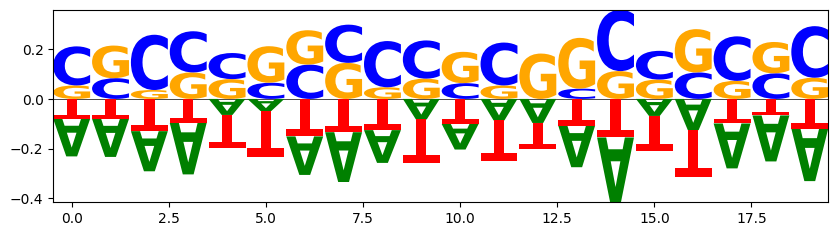

In [17]:
import logomaker as lm
lm.Logo(df)

In [18]:
def consensus_seq(best_motifs, k) -> str:
    """Returns the consensus sequence of the best motifs."""
    profile =  [{'A': 0, 'C': 0 , 'G': 0, 'T': 0} for _ in range(k)]
    for i in range(k):
        for motif in best_motifs:
            base = motif[i]
            profile[i][base] += 1
    consensus = ""
    for i in range(k):
        base = max(profile[i], key=profile[i].get)
        consensus += base
    return consensus

In [19]:
consensus_seq(foo3, 20)

'CGCCCGCCCCGCGGCCGCGC'